In [1]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

### 📌 **Redes Neurais: conjunto sem balanceamento**

In [2]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [3]:
X_census_training_set.shape, y_census_training_set.shape

((27656, 41), (27656,))

In [4]:
X_census_test_set.shape, y_census_test_set.shape

((4881, 41), (4881,))

In [5]:
(41 + 1) / 2

21.0

In [6]:
neural_network = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (21,21))
neural_network.fit(X_census_training_set, y_census_training_set)

Iteration 1, loss = 0.46387758
Iteration 2, loss = 0.38313575
Iteration 3, loss = 0.37149548
Iteration 4, loss = 0.36527750
Iteration 5, loss = 0.36087167
Iteration 6, loss = 0.35824594
Iteration 7, loss = 0.35643305
Iteration 8, loss = 0.35570769
Iteration 9, loss = 0.35407482
Iteration 10, loss = 0.35333735
Iteration 11, loss = 0.35320472
Iteration 12, loss = 0.35184056
Iteration 13, loss = 0.35183160
Iteration 14, loss = 0.35124258
Iteration 15, loss = 0.35047382
Iteration 16, loss = 0.35044952
Iteration 17, loss = 0.34981298
Iteration 18, loss = 0.34891719
Iteration 19, loss = 0.34881114
Iteration 20, loss = 0.34809121
Iteration 21, loss = 0.34716610
Iteration 22, loss = 0.34747819
Iteration 23, loss = 0.34631814
Iteration 24, loss = 0.34572333
Iteration 25, loss = 0.34487738
Iteration 26, loss = 0.34451703
Iteration 27, loss = 0.34390391
Iteration 28, loss = 0.34320985
Iteration 29, loss = 0.34357620
Iteration 30, loss = 0.34280321
Iteration 31, loss = 0.34243303
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(21, 21), max_iter=1000, tol=1e-05,
              verbose=True)

In [7]:
predictor = neural_network.predict(X_census_test_set)
predictor

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [8]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [10]:
accuracy_score(y_census_test_set, predictor)

0.8424503175578775

In [11]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3653
        >50K       0.72      0.62      0.66      1228

    accuracy                           0.84      4881
   macro avg       0.80      0.77      0.78      4881
weighted avg       0.84      0.84      0.84      4881



0.8424503175578775

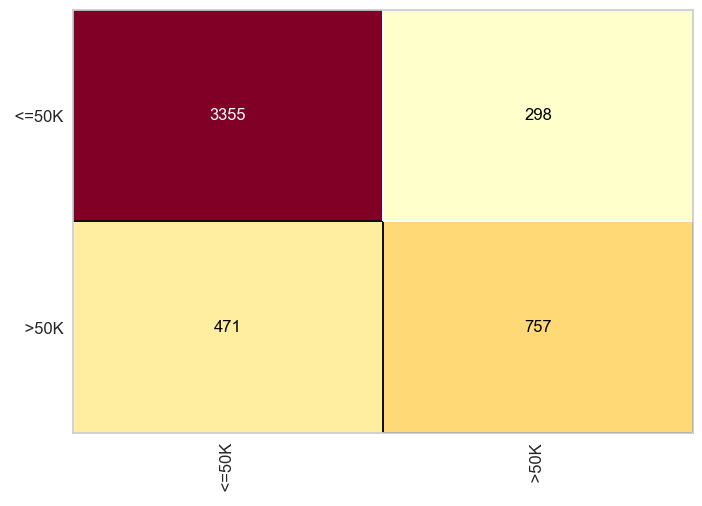

In [12]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [13]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [14]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42090, 41), (42090,))

In [15]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4881, 41), (4881,))

In [16]:
neural_network_ros = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (21,21))
neural_network_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

Iteration 1, loss = 0.56084235
Iteration 2, loss = 0.44023198
Iteration 3, loss = 0.43284830
Iteration 4, loss = 0.42961739
Iteration 5, loss = 0.42766626
Iteration 6, loss = 0.42598771
Iteration 7, loss = 0.42558799
Iteration 8, loss = 0.42294314
Iteration 9, loss = 0.42245670
Iteration 10, loss = 0.42161413
Iteration 11, loss = 0.41999430
Iteration 12, loss = 0.41909823
Iteration 13, loss = 0.41888548
Iteration 14, loss = 0.41916441
Iteration 15, loss = 0.41781544
Iteration 16, loss = 0.41746178
Iteration 17, loss = 0.41765395
Iteration 18, loss = 0.41592699
Iteration 19, loss = 0.41749415
Iteration 20, loss = 0.41646328
Iteration 21, loss = 0.41523392
Iteration 22, loss = 0.41522992
Iteration 23, loss = 0.41519888
Iteration 24, loss = 0.41449834
Iteration 25, loss = 0.41497855
Iteration 26, loss = 0.41360956
Iteration 27, loss = 0.41428602
Iteration 28, loss = 0.41429516
Iteration 29, loss = 0.41400147
Iteration 30, loss = 0.41434200
Iteration 31, loss = 0.41348644
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(21, 21), max_iter=1000, tol=1e-05,
              verbose=True)

In [17]:
predictor_ros = neural_network_ros.predict(X_census_test_set_ros)
predictor_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [18]:
y_census_test_set_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [19]:
accuracy_score(y_census_test_set_ros, predictor_ros)

0.774021716861299

In [20]:
print(classification_report(y_census_test_set_ros, predictor_ros))

              precision    recall  f1-score   support

       <=50K       0.94      0.74      0.83      3653
        >50K       0.53      0.87      0.66      1228

    accuracy                           0.77      4881
   macro avg       0.74      0.81      0.75      4881
weighted avg       0.84      0.77      0.79      4881



0.774021716861299

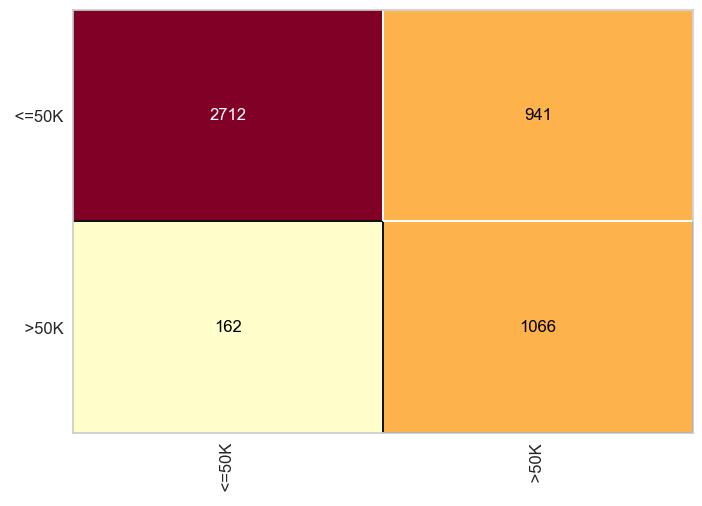

In [21]:
cm = ConfusionMatrix(neural_network_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'SMOTE'**

In [22]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [23]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42090, 41), (42090,))

In [24]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4881, 41), (4881,))

In [25]:
neural_network_smote = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (21,21))
neural_network_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

Iteration 1, loss = 0.67068729
Iteration 2, loss = 0.43846402
Iteration 3, loss = 0.41566196
Iteration 4, loss = 0.41067594
Iteration 5, loss = 0.40737574
Iteration 6, loss = 0.40423618
Iteration 7, loss = 0.40427465
Iteration 8, loss = 0.40508498
Iteration 9, loss = 0.40214914
Iteration 10, loss = 0.40271278
Iteration 11, loss = 0.40191851
Iteration 12, loss = 0.39957809
Iteration 13, loss = 0.39946328
Iteration 14, loss = 0.39929421
Iteration 15, loss = 0.39850687
Iteration 16, loss = 0.39866489
Iteration 17, loss = 0.39604716
Iteration 18, loss = 0.39529722
Iteration 19, loss = 0.39551792
Iteration 20, loss = 0.39475042
Iteration 21, loss = 0.39348347
Iteration 22, loss = 0.39347874
Iteration 23, loss = 0.39184520
Iteration 24, loss = 0.39383982
Iteration 25, loss = 0.39225340
Iteration 26, loss = 0.39028614
Iteration 27, loss = 0.39092134
Iteration 28, loss = 0.39122838
Iteration 29, loss = 0.39000959
Iteration 30, loss = 0.39090758
Iteration 31, loss = 0.38947645
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(21, 21), max_iter=1000, tol=1e-05,
              verbose=True)

In [26]:
predictor_smote = neural_network_smote.predict(X_census_test_set_smote)
predictor_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [27]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [28]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.7893874206105306

In [29]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.77      0.85      3653
        >50K       0.55      0.83      0.67      1228

    accuracy                           0.79      4881
   macro avg       0.74      0.80      0.76      4881
weighted avg       0.84      0.79      0.80      4881



0.7893874206105306

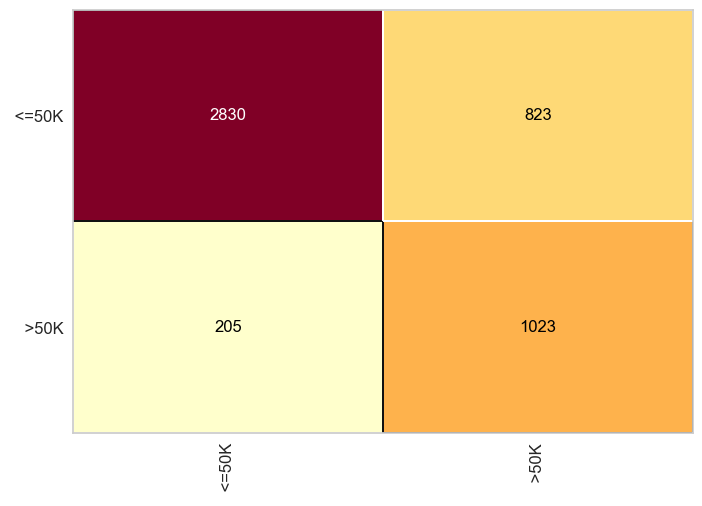

In [30]:
cm = ConfusionMatrix(neural_network_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [31]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [32]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13222, 41), (13222,))

In [33]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4881, 41), (4881,))

In [34]:
neural_network_rus = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (21,21))
neural_network_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

Iteration 1, loss = 1.58575594
Iteration 2, loss = 0.61208495
Iteration 3, loss = 0.55550464
Iteration 4, loss = 0.49773675
Iteration 5, loss = 0.46040552
Iteration 6, loss = 0.44549867
Iteration 7, loss = 0.44297020
Iteration 8, loss = 0.43538984
Iteration 9, loss = 0.43369045
Iteration 10, loss = 0.43063769
Iteration 11, loss = 0.43042158
Iteration 12, loss = 0.42898329
Iteration 13, loss = 0.42852211
Iteration 14, loss = 0.42878012
Iteration 15, loss = 0.42689961
Iteration 16, loss = 0.42616577
Iteration 17, loss = 0.42662855
Iteration 18, loss = 0.42421031
Iteration 19, loss = 0.42403527
Iteration 20, loss = 0.42316413
Iteration 21, loss = 0.42311016
Iteration 22, loss = 0.42253971
Iteration 23, loss = 0.42450775
Iteration 24, loss = 0.42360653
Iteration 25, loss = 0.42134703
Iteration 26, loss = 0.42468755
Iteration 27, loss = 0.42116709
Iteration 28, loss = 0.42076205
Iteration 29, loss = 0.42035045
Iteration 30, loss = 0.42141634
Iteration 31, loss = 0.42212963
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(21, 21), max_iter=1000, tol=1e-05,
              verbose=True)

In [35]:
predictor_rus = neural_network_rus.predict(X_census_test_set_rus)
predictor_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [36]:
y_census_test_set_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [37]:
accuracy_score(y_census_test_set_rus, predictor_rus)

0.7912313050604385

In [38]:
print(classification_report(y_census_test_set_rus, predictor_rus))

              precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85      3653
        >50K       0.56      0.83      0.67      1228

    accuracy                           0.79      4881
   macro avg       0.74      0.80      0.76      4881
weighted avg       0.84      0.79      0.80      4881



0.7912313050604385

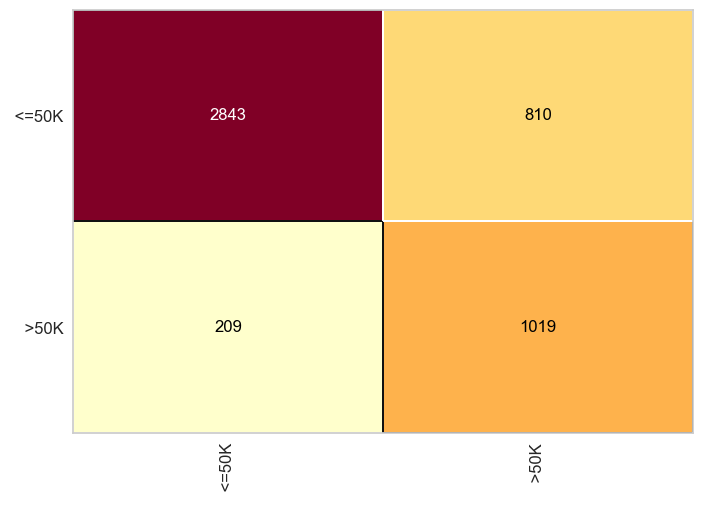

In [39]:
cm = ConfusionMatrix(neural_network_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'NearMiss'**

In [40]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [41]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13222, 41), (13222,))

In [42]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4881, 41), (4881,))

In [43]:
neural_network_nearmiss = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (21,21))
neural_network_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

Iteration 1, loss = 0.74894499
Iteration 2, loss = 0.64362337
Iteration 3, loss = 0.62085823
Iteration 4, loss = 0.60584292
Iteration 5, loss = 0.59812481
Iteration 6, loss = 0.59348644
Iteration 7, loss = 0.58896999
Iteration 8, loss = 0.58646327
Iteration 9, loss = 0.58409631
Iteration 10, loss = 0.58410917
Iteration 11, loss = 0.58268945
Iteration 12, loss = 0.58354818
Iteration 13, loss = 0.58365502
Iteration 14, loss = 0.58088456
Iteration 15, loss = 0.58353769
Iteration 16, loss = 0.58492672
Iteration 17, loss = 0.57981981
Iteration 18, loss = 0.57769493
Iteration 19, loss = 0.57937319
Iteration 20, loss = 0.57626261
Iteration 21, loss = 0.57908568
Iteration 22, loss = 0.57653048
Iteration 23, loss = 0.57594420
Iteration 24, loss = 0.57708351
Iteration 25, loss = 0.57566812
Iteration 26, loss = 0.57347521
Iteration 27, loss = 0.57338677
Iteration 28, loss = 0.57326558
Iteration 29, loss = 0.57252959
Iteration 30, loss = 0.57287958
Iteration 31, loss = 0.57260689
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(21, 21), max_iter=1000, tol=1e-05,
              verbose=True)

In [44]:
predictor_nearmiss = neural_network_nearmiss.predict(X_census_test_set_nearmiss)
predictor_nearmiss

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [45]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [46]:
accuracy_score(y_census_test_set_nearmiss, predictor_nearmiss)

0.6443351772177832

In [47]:
print(classification_report(y_census_test_set_nearmiss, predictor_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.87      0.62      0.72      3653
        >50K       0.39      0.72      0.50      1228

    accuracy                           0.64      4881
   macro avg       0.63      0.67      0.61      4881
weighted avg       0.75      0.64      0.67      4881



0.6443351772177832

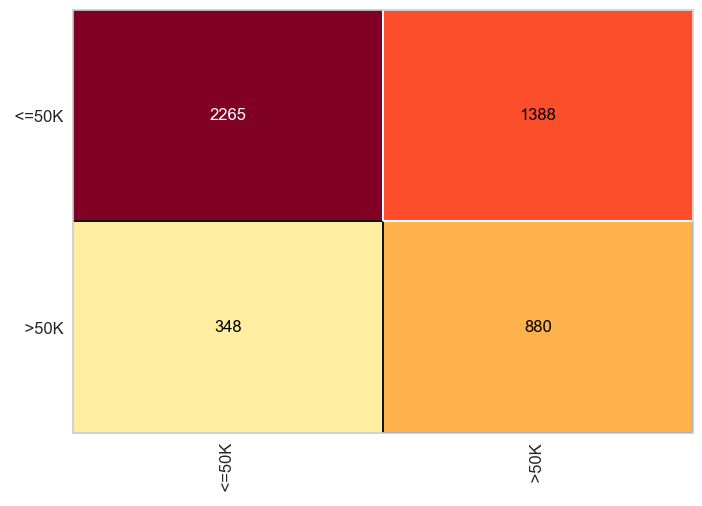

In [48]:
cm = ConfusionMatrix(neural_network_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)